In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json


In [2]:
si = pd.read_csv("Superhero/superhero_info - superhero_info.csv")
si.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [4]:
sp = pd.read_csv("Superhero/superhero_powers - superhero_powers.csv")
sp.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [14]:
# Split the Hero|Publisher columns to hero
si[['Hero', 'Publisher']] = si['Hero|Publisher'].str.split('|', expand = True)
si.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [15]:
# drop the original column
si = si.drop(columns = ['Hero|Publisher'])
si.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [16]:
# seperating the Measurments column into 2 columns
si.loc[0, 'Measurements']

"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [22]:
# Change the single quotes to double quotes
si['Measurements'] = si['Measurements'].str.replace("'", '"')

In [23]:
si['Measurements'] = si['Measurements'].apply(json.loads)
si.loc[0, 'Measurements']

{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [25]:
height_weight = si['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [26]:
# adding both columns to original df
si = pd.concat((si, height_weight), axis = 1)
si.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [27]:
# dropping the original "Measurements" column
si = si.drop(columns = ["Measurements"])
si.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [28]:
# # replacing the 'cm' with nothing
si['Height'] = si['Height'].str.replace('cm', '')
si['Height'].head(2)

0    203.0 
1    191.0 
Name: Height, dtype: object

In [29]:
# change column to numeric
si['Height'] = pd.to_numeric(si['Height'])

In [30]:
# replacing the 'kg' with nothing
si['Weight'] = si['Weight'].str.replace('kg', '')
si['Weight'].head(2)

0    441.0 
1     65.0 
Name: Weight, dtype: object

In [31]:
# change column to numeric
si['Weight'] = pd.to_numeric(si['Weight'])

In [32]:
si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height      463 non-null    float64
 9   Weight      463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


## One Hot Encoding

In [36]:
# one hot encoding powers column
sp['Powers'].head(2)

0           Agility,Super Strength,Stamina,Super Speed
1    Accelerated Healing,Durability,Longevity,Super...
Name: Powers, dtype: object

In [37]:
sp.loc[0, 'Powers']

'Agility,Super Strength,Stamina,Super Speed'

In [38]:
# splitting the comma
sp['powers_split'] = sp['Powers'].str.split(',')

In [41]:
exploded =sp.explode('powers_split')

In [42]:
unique_cols = exploded['powers_split'].dropna().unique()
unique_cols

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [46]:
# using a for loop to create the poweer column
for col in unique_cols:
    sp[col] = sp['Powers'].str.contains(col)
sp.head()

/var/folders/j7/rq_q1cb16yx0w__bmvd7lzx80000gn/T/ipykernel_67030/2565991603.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp[col] = sp['Powers'].str.contains(col)
/var/folders/j7/rq_q1cb16yx0w__bmvd7lzx80000gn/T/ipykernel_67030/2565991603.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp[col] = sp['Powers'].str.contains(col)
/var/folders/j7/rq_q1cb16yx0w__bmvd7lzx80000gn/T/ipykernel_67030/2565991603.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

,hero_names,Powers,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Combine

In [47]:
# combining si and sp df
merged = pd.merge(si, sp, left_on = 'Hero', right_on = 'hero_names')
merged.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


### Questions

In [48]:
# Compare the average weight of super powers who have Super Speed to those who do not.
merged.groupby('Super Speed')['Weight'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

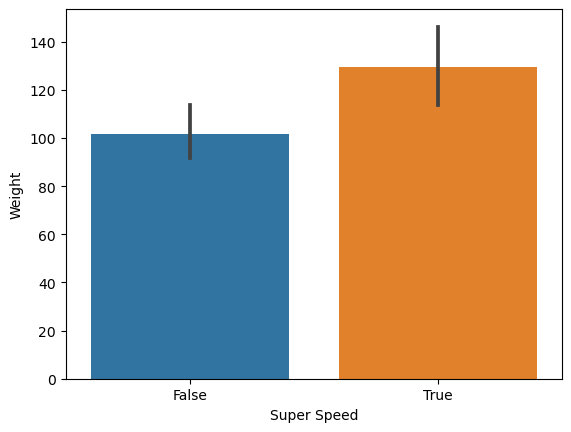

In [50]:
# plotting a barplot to visualize comparisons
sns.barplot(data = merged, x = 'Super Speed', y = 'Weight');

In [51]:
# What is the average height of heroes for each publisher?
merged.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

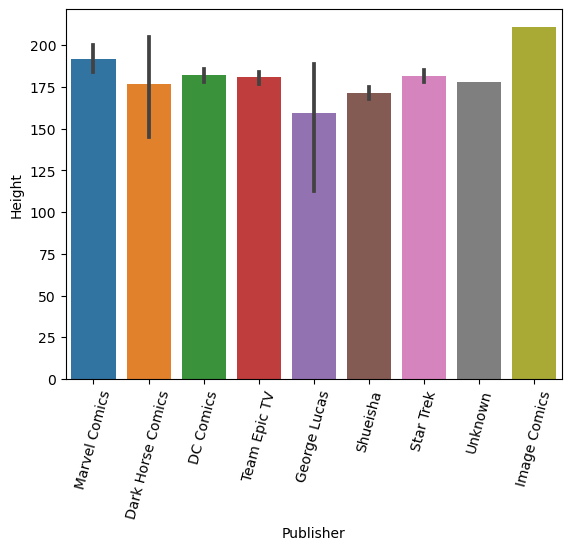

In [53]:
# plotting a barplot to visualize average height
ax = sns.barplot(data = merged, x = 'Publisher', y = 'Height')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75);